# chap 2 question 4

4(a) – Classification Applications
1. Email Spam Detection
Response (target): Spam or Not Spam (binary classification)

Predictors: Email content (words), sender address, subject line, number of links, etc.

Goal: Prediction – The goal is to accurately classify incoming emails as spam or not spam.

2. Credit Card Fraud Detection
Response: Fraudulent or Legitimate transaction

Predictors: Transaction amount, time, location, device, frequency, etc.

Goal: Prediction – The system aims to automatically flag likely fraudulent transactions in real time.

3. Disease Diagnosis (e.g., Cancer Detection)
Response: Cancerous vs. Non-cancerous

Predictors: Imaging data, biopsy results, genetic markers, patient age, etc.

Goal: Inference & Prediction – You want to not only predict the disease presence but also understand which factors contribute to the risk.

4(b) – Regression Applications
1. House Price Prediction
Response: House price (continuous value)

Predictors: Number of bedrooms, location, square footage, age of house, etc.

Goal: Prediction – Estimate future prices of houses for buyers/sellers.

2. Student Performance Forecasting
Response: Final exam score

Predictors: Study hours, attendance, past performance, number of assignments submitted, etc.

Goal: Inference & Prediction – Predict performance and identify which factors most impact results.

3. Sales Forecasting
Response: Future sales volume

Predictors: Advertising spend, seasonality, pricing, customer behavior, economic indicators

Goal: Prediction – Accurately estimate sales to manage inventory and operations.

4(c) – Cluster Analysis Applications
1. Customer Segmentation
Use: Group customers by purchasing behavior

Predictors: Purchase frequency, product types, spending level, demographics

Purpose: Identify segments (e.g., loyal, budget-conscious, seasonal shoppers) for targeted marketing.

2. Document Categorization
Use: Automatically group similar documents/articles

Predictors: Word frequencies, topics, document length

Purpose: Organize content for search engines or recommendation systems without predefined categories.

3. Anomaly Detection in Network Traffic
Use: Identify unusual patterns in internet traffic

Predictors: Packet size, frequency, destination IP, time of access

Purpose: Detect potential cyber-attacks or system faults by clustering normal behavior and spotting outliers.

Question 7

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

# Create the dataset
data = {
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y':  ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}

df = pd.DataFrame(data, index=[1, 2, 3, 4, 5, 6])

# Define test point
test_point = np.array([0, 0, 0])

# Compute Euclidean distances
df['Distance'] = np.sqrt((df['X1'] - test_point[0])**2 + 
                         (df['X2'] - test_point[1])**2 + 
                         (df['X3'] - test_point[2])**2)

# Sort by distance
df_sorted = df.sort_values('Distance')

# Display distances
print("Distances from test point (0,0,0):")
print(df_sorted[['X1', 'X2', 'X3', 'Y', 'Distance']])

# Prediction for K=1
k1_neighbors = df_sorted.head(1)
k1_prediction = Counter(k1_neighbors['Y']).most_common(1)[0][0]
print(f"\nPrediction with K=1: {k1_prediction}")

# Prediction for K=3
k3_neighbors = df_sorted.head(3)
k3_prediction = Counter(k3_neighbors['Y']).most_common(1)[0][0]
print(f"Prediction with K=3: {k3_prediction}")


Distances from test point (0,0,0):
   X1  X2  X3      Y  Distance
5  -1   0   1  Green  1.414214
6   1   1   1    Red  1.732051
2   2   0   0    Red  2.000000
4   0   1   2  Green  2.236068
1   0   3   0    Red  3.000000
3   0   1   3    Red  3.162278

Prediction with K=1: Green
Prediction with K=3: Red


Note:
The closest point is Observation 5 (Green) → K=1 prediction is Green

The 3 nearest neighbors are: Green, Red, Red → majority vote is Red
(d) If Bayes boundary is highly nonlinear, should K be large or small? solution :K should be small.

Why

A nonlinear boundary needs the model to be flexible and responsive to local changes.

A smaller K allows the model to adapt closely to the local structure.

A larger K smooths over local detail, which may oversimplify a nonlinear pattern and result in underfitting.


# Ch 3

# question 4

Question 4 from Chapter 3:
a) We expect the training RSS for the cubic regression to be lower than that of the linear regression, because it has more flexibility and can better fit the training data — even if those extra terms are not needed.

b) We expect the test RSS to be lower for the linear regression, because the cubic regression may overfit to noise in the training data, increasing its test error.

c) We expect the training RSS to be lower for the cubic regression, because it has more parameters to better fit both linear and nonlinear patterns.

d) There is not enough information to tell which test RSS will be lower. It depends on how nonlinear the true relationship is. The cubic model might perform better if the nonlinearity is substantial, but might overfit if the nonlinearity is minimal.
"""

##### Question 9 from Chap 3 This question involves the use of multiple linear regression on the Auto data set.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
# Load and clean data
auto_df = pd.read_csv("Auto.csv")
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df.dropna(inplace=True)

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

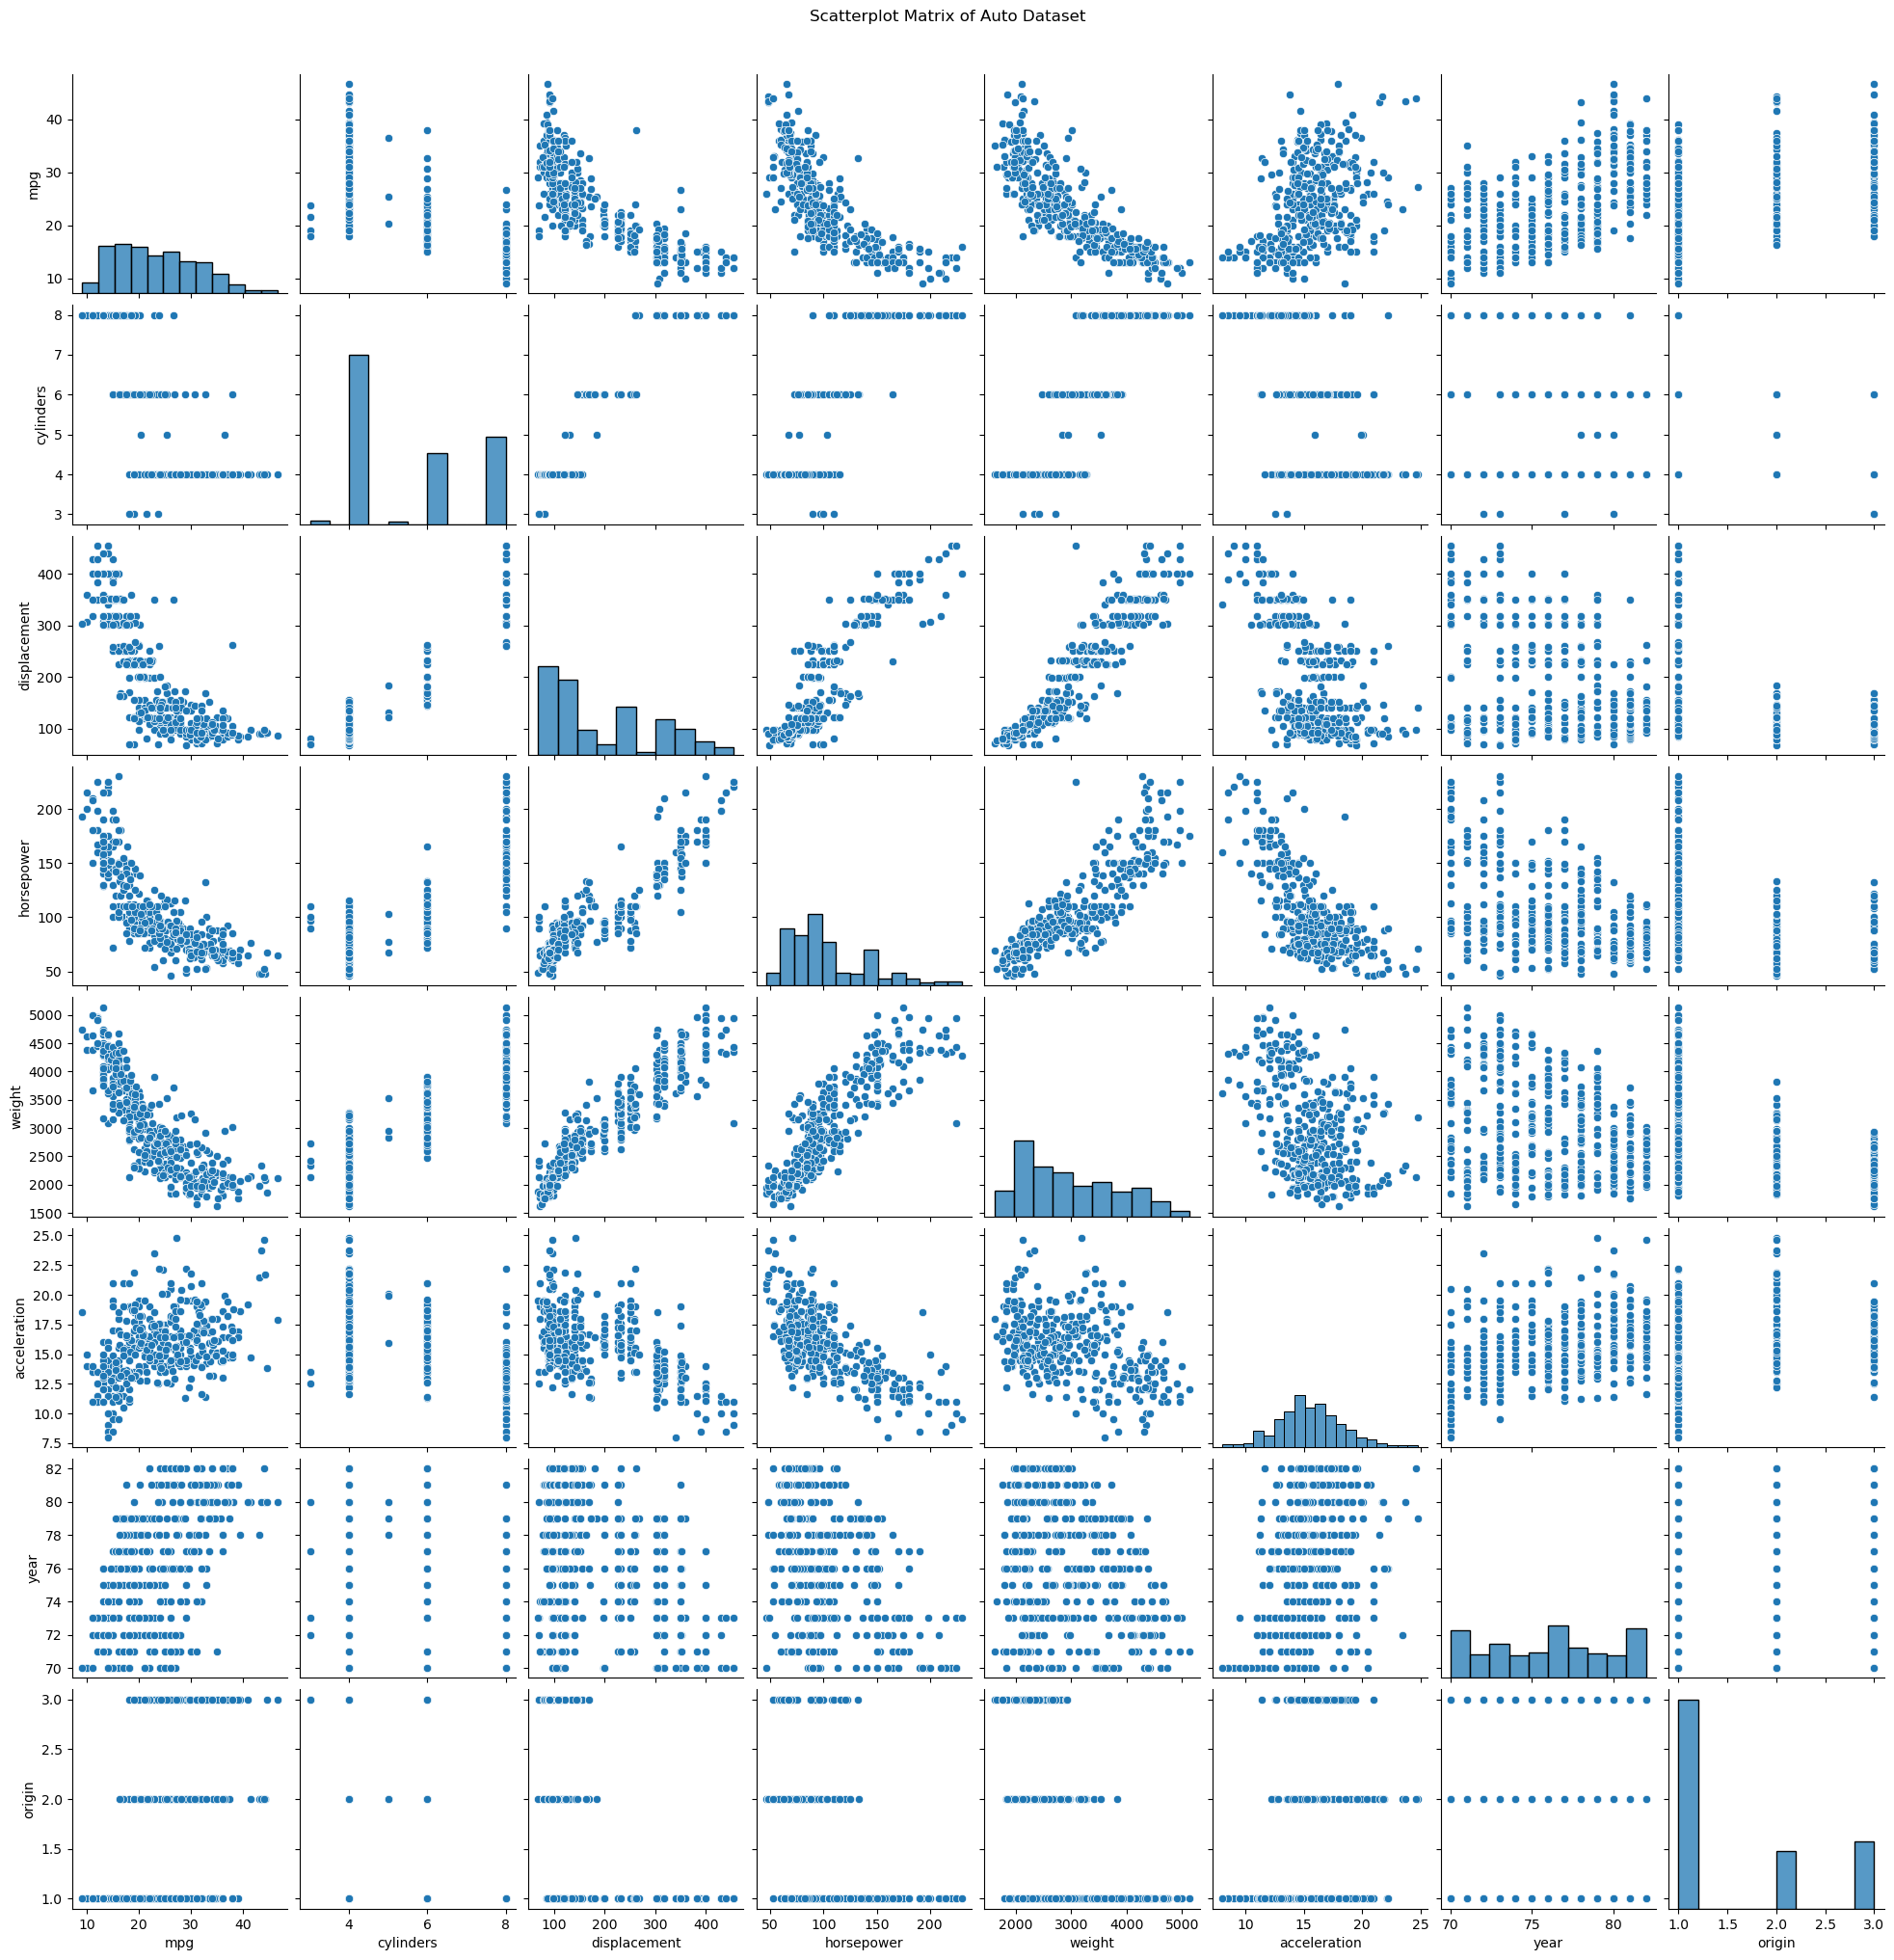

In [6]:
# (a) Scatterplot Matrix
sns.pairplot(auto_df.drop(columns=['name']))
plt.suptitle("Scatterplot Matrix of Auto Dataset", y=1.02)
plt.show()

(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

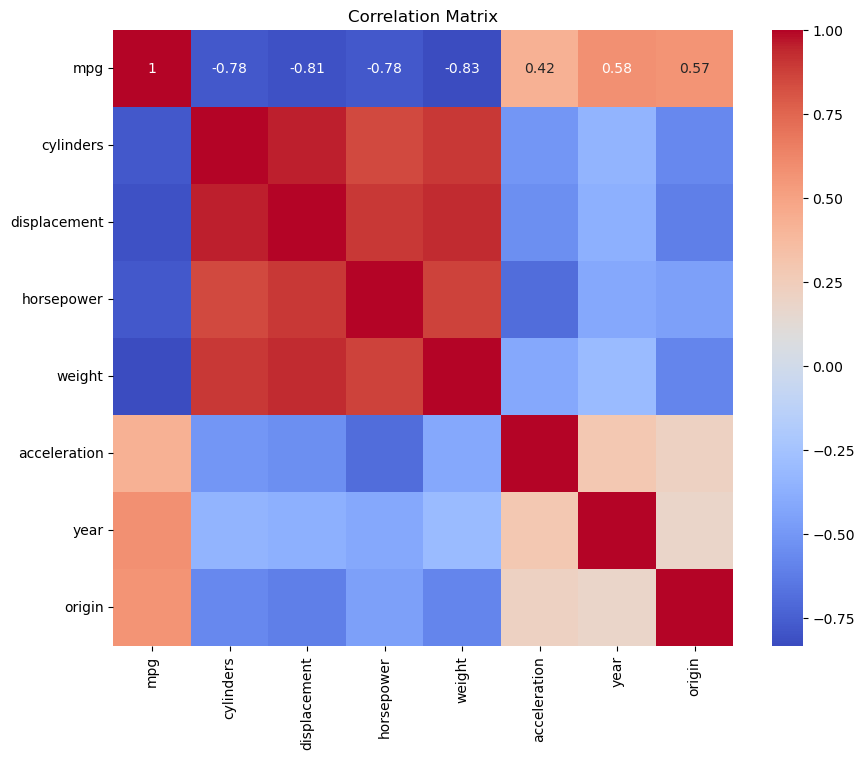

In [8]:
# (b) Correlation Matrix
correlation_matrix = auto_df.drop(columns=['name']).corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


(c) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output.

In [9]:
# (c) Multiple Linear Regression
auto_df_clean = auto_df.drop(columns=['name'])
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = ols(formula, data=auto_df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        15:44:20   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.

In [10]:
# (c.i) ANOVA
anova_results = anova_lm(model)
print("ANOVA Results:")
print(anova_results)

ANOVA Results:
                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


ii. Which predictors appear to have a statistically signifcant
relationship to the response?

(d) Produce some of diagnostic plots of the linear regression ft as
described in the lab. Comment on any problems you see with the
ft. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

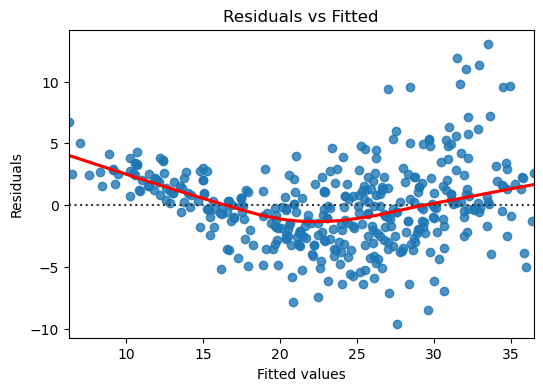

In [11]:
# (d) Diagnostic Plots
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


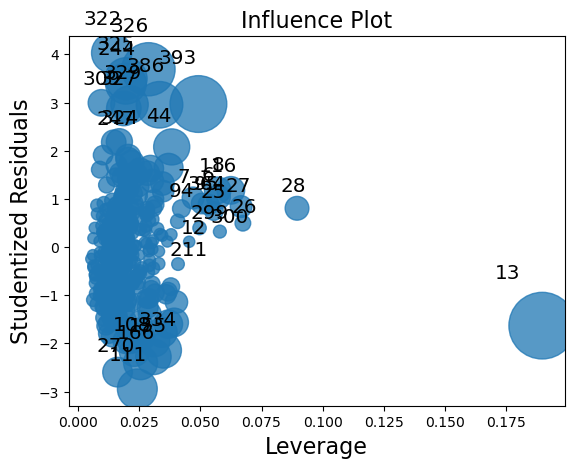

In [12]:
sm.graphics.influence_plot(model, criterion="cooks")
plt.show()

(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically signifcant?

In [13]:
# (e) Interaction Terms
interaction_model = ols('mpg ~ weight * horsepower + year + cylinders + displacement + acceleration + origin', data=auto_df_clean).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.88e-159
Time:                        15:46:18   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8757      4.51

(f) Try a few diferent transformations of the variables, such as
log(X),
√
X, X2
. Comment on your fndings.

In [14]:
# (f) Transformations
model_log_disp = ols('mpg ~ np.log(displacement) + horsepower + weight + acceleration + year + origin + cylinders', data=auto_df_clean).fit()
print("Log(displacement) model:")
print(model_log_disp.summary())

Log(displacement) model:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          6.13e-141
Time:                        15:46:49   Log-Likelihood:                -1019.9
No. Observations:                 392   AIC:                             2056.
Df Residuals:                     384   BIC:                             2088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Interce

In [15]:
model_sqrt_weight = ols('mpg ~ np.sqrt(weight) + horsepower + displacement + acceleration + year + origin + cylinders', data=auto_df_clean).fit()
print("Sqrt(weight) model:")
print(model_sqrt_weight.summary())

Sqrt(weight) model:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     279.4
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          2.05e-146
Time:                        15:47:18   Log-Likelihood:                -1007.0
No. Observations:                 392   AIC:                             2030.
Df Residuals:                     384   BIC:                             2062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.

In [16]:
model_year_squared = ols('mpg ~ year + I(year**2) + horsepower + weight + displacement + acceleration + origin + cylinders', data=auto_df_clean).fit()
print("Year + Year^2 model:")
print(model_year_squared.summary())

Year + Year^2 model:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     240.5
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          3.15e-144
Time:                        15:47:46   Log-Likelihood:                -1009.2
No. Observations:                 392   AIC:                             2036.
Df Residuals:                     383   BIC:                             2072.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      413.7599    

# Question 14 from chapter 3


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [19]:
# (a) Generate synthetic data
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

Correlation between x1 and x2: 0.77


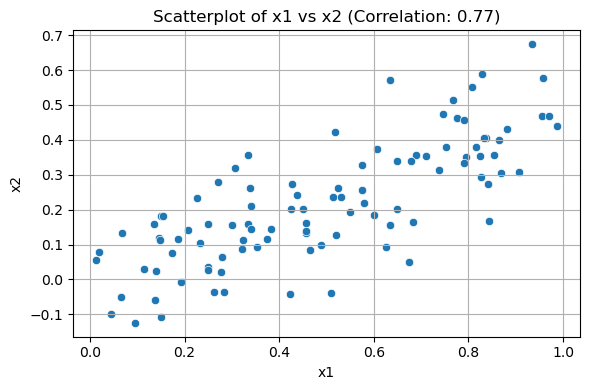

In [20]:
# (b) Correlation and scatterplot
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=x1, y=x2)
plt.title(f"Scatterplot of x1 vs x2 (Correlation: {correlation:.2f})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# (c) Multiple regression y ~ x1 + x2
X_full = sm.add_constant(df[['x1', 'x2']])
model_full = sm.OLS(df['y'], X_full).fit()
print("\nMultiple Regression (y ~ x1 + x2):")
print(model_full.summary())


Multiple Regression (y ~ x1 + x2):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           5.76e-08
Time:                        15:50:25   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

In [22]:
# (d) Regression y ~ x1 only
X_x1 = sm.add_constant(df[['x1']])
model_x1 = sm.OLS(df['y'], X_x1).fit()
print("\nSimple Regression (y ~ x1):")
print(model_x1.summary())


Simple Regression (y ~ x1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.37e-08
Time:                        15:50:55   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371  

In [23]:
# (e) Regression y ~ x2 only
X_x2 = sm.add_constant(df[['x2']])
model_x2 = sm.OLS(df['y'], X_x2).fit()
print("\nSimple Regression (y ~ x2):")
print(model_x2.summary())



Simple Regression (y ~ x2):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           7.43e-07
Time:                        15:51:22   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239  

In [24]:
# (f) Interpretation:
print("\nNote: Individually, both x1 and x2 are significant.")
print("In the combined model, collinearity makes x2 appear insignificant.")


Note: Individually, both x1 and x2 are significant.
In the combined model, collinearity makes x2 appear insignificant.


In [25]:
# (g) Add mismeasured outlier observation
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])
df_new = pd.DataFrame({'x1': x1_new, 'x2': x2_new, 'y': y_new})

In [26]:
# Re-fit all models
X_full_new = sm.add_constant(df_new[['x1', 'x2']])
model_full_new = sm.OLS(df_new['y'], X_full_new).fit()

In [27]:
X_x1_new = sm.add_constant(df_new[['x1']])
model_x1_new = sm.OLS(df_new['y'], X_x1_new).fit()

X_x2_new = sm.add_constant(df_new[['x2']])
model_x2_new = sm.OLS(df_new['y'], X_x2_new).fit()

In [29]:
print("\nWith Outlier Added:")
print("\nFull Model with Outlier:")
print(model_full_new.summary())

print("\nModel (y ~ x1) with Outlier:")
print(model_x1_new.summary())

print("\nModel (y ~ x2) with Outlier:")
print(model_x2_new.summary())




With Outlier Added:

Full Model with Outlier:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           4.60e-08
Time:                        15:54:25   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

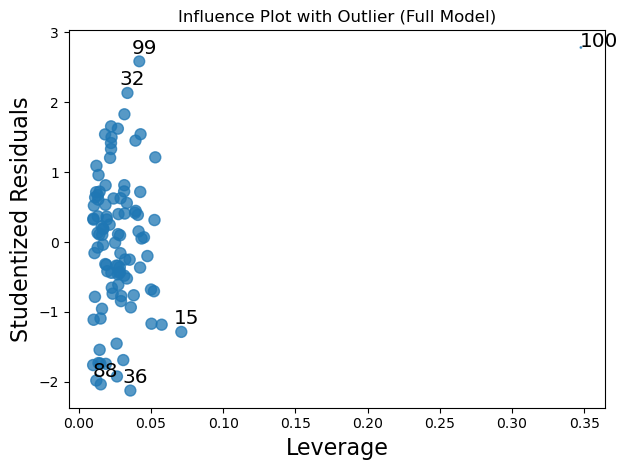

'\nIn the full model, the presence of the outlier increased multicollinearity sensitivity: x1 is now marginally insignificant, while x2 became more significant.\n\nThe influence plot shows this new point (#100) has very high leverage and a large residual → it is both an outlier and a high-leverage point.\n'

In [30]:
# Influence plot for full model with outlier
sm.graphics.influence_plot(model_full_new, criterion="cooks", size=1)
plt.title("Influence Plot with Outlier (Full Model)")
plt.tight_layout()
plt.show()


"""
In the full model, the presence of the outlier increased multicollinearity sensitivity: x1 is now marginally insignificant, while x2 became more significant.

The influence plot shows this new point (#100) has very high leverage and a large residual → it is both an outlier and a high-leverage point.
"""


# CHAP 4 :CLASSIFICATION

###### QUESTION 4

When the number of features p is large, there tends to be a deterioration in the performance of KNN and other local approaches that
perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is
known as the curse of dimensionality, and it ties into the fact that curse of dimensionality non-parametric approaches often perform poorly when p is large. We
will now investigate this curse.

(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly
(evenly) distributed on [0, 1]. Associated with each observation
is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10 % of
the range of X closest to that test observation. For instance, in
order to predict the response for a test observation with X = 0.6,
we will use observations in the range [0.55, 0.65]. On average,
what fraction of the available observations will we use to make
the prediction?


In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Part (a): p = 1 feature (10% range)
def fraction_used_p1(n_samples=100000):
    X = np.random.uniform(0, 1, n_samples)
    test_point = 0.6  # Arbitrary test point
    lower, upper = test_point - 0.05, test_point + 0.05
    mask = (X >= lower) & (X <= upper)
    return np.mean(mask)

frac_p1 = fraction_used_p1()
print("(a) Fraction of observations used (p=1):", f"{frac_p1:.3f} (Expected: ~0.1)")

(a) Fraction of observations used (p=1): 0.100 (Expected: ~0.1)


(b) Now suppose that we have a set of observations, each with
measurements on p = 2 features, X1 and X2. We assume that
(X1, X2) are uniformly distributed on [0, 1] × [0, 1]. We wish to
predict a test observation’s response using only observations that
are within 10 % of the range of X1 and within 10 % of the range
of X2 closest to that test observation. For instance, in order to
predict the response for a test observation with X1 = 0.6 and
X2 = 0.35, we will use observations in the range [0.55, 0.65] for
X1 and in the range [0.3, 0.4] for X2. On average, what fraction
of the available observations will we use to make the prediction?

In [5]:
# Part (b): p = 2 features (10% range each)
def fraction_used_p2(n_samples=100000):
    X1 = np.random.uniform(0, 1, n_samples)
    X2 = np.random.uniform(0, 1, n_samples)
    test_point = (0.6, 0.35)  # Arbitrary test point
    mask1 = (X1 >= test_point[0] - 0.05) & (X1 <= test_point[0] + 0.05)
    mask2 = (X2 >= test_point[1] - 0.05) & (X2 <= test_point[1] + 0.05)
    return np.mean(mask1 & mask2)

frac_p2 = fraction_used_p2()
print("(b) Fraction of observations used (p=2):", f"{frac_p2:.4f} (Expected: ~0.01)")

(b) Fraction of observations used (p=2): 0.0099 (Expected: ~0.01)


(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each
feature, and again each feature ranges in value from 0 to 1. We
wish to predict a test observation’s response using observations
within the 10 % of each feature’s range that is closest to that test
observation. What fraction of the available observations will we
use to make the prediction?


In [6]:
# Part (c): p = 100 features (10% range each)
def fraction_used_p100():
    return 0.1 ** 100  # Volume of hypercube in 100D

frac_p100 = fraction_used_p100()
print("(c) Fraction of observations used (p=100):", f"{frac_p100:.2e} (Theoretical)")

(c) Fraction of observations used (p=100): 1.00e-100 (Theoretical)


(d) Using your answers to parts (a)–(c), argue that a drawback of
KNN when p is large is that there are very few training observations “near” any given test observation.

In [7]:
# Part (d): Explanation of the curse of dimensionality
print("\n(d) Why KNN fails for large p:")
print("- For p=1, ~10% of data is 'nearby'.")
print("- For p=2, only ~1% is 'nearby'.")
print("- For p=100, almost no points are nearby (fraction = 1e-100).")
print("- KNN relies on 'local' points, but in high dimensions, 'local' is empty!")


(d) Why KNN fails for large p:
- For p=1, ~10% of data is 'nearby'.
- For p=2, only ~1% is 'nearby'.
- For p=100, almost no points are nearby (fraction = 1e-100).
- KNN relies on 'local' points, but in high dimensions, 'local' is empty!


(e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around
the test observation that contains, on average, 10 % of the training observations. For p = 1, 2, and 100, what is the length of each
side of the hypercube? Comment on your answer.

Note: A hypercube is a generalization of a cube to an arbitrary
number of dimensions. When p = 1, a hypercube is simply a line
segment, when p = 2 it is a square, and when p = 100 it is a
100-dimensional cube.


In [8]:
# Part (e): Hypercube side length for 10% coverage
def hypercube_side_length(p):
    return 0.1 ** (1 / p)

p_values = [1, 2, 100]
side_lengths = [hypercube_side_length(p) for p in p_values]

print("\n(e) Hypercube side lengths to capture 10% of data:")
for p, s in zip(p_values, side_lengths):
    print(f"- p={p}: side length = {s:.3f}")
print("\nComment: For p=100, the side length is ~0.977,meaning we need almost the entire range in each dimension to capture 10% of the data!")


(e) Hypercube side lengths to capture 10% of data:
- p=1: side length = 0.100
- p=2: side length = 0.316
- p=100: side length = 0.977

Comment: For p=100, the side length is ~0.977,meaning we need almost the entire range in each dimension to capture 10% of the data!


In [9]:
# Part (e): Calculate side lengths for p=1,2,100
p_values = [1, 2, 100]
side_lengths = [hypercube_side_length(p) for p in p_values]
print("(e) Side lengths for p=1,2,100:", side_lengths)

(e) Side lengths for p=1,2,100: [0.1, 0.31622776601683794, 0.9772372209558107]


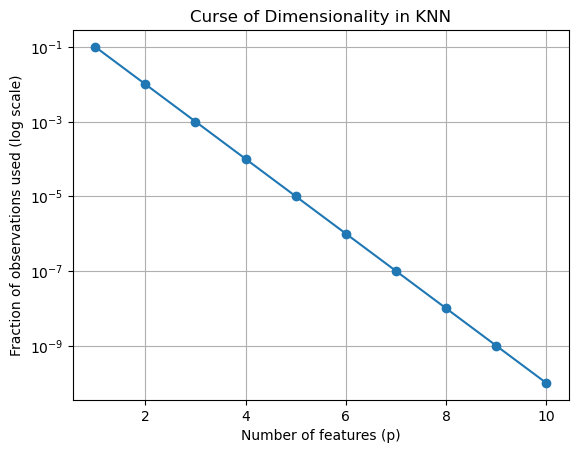

In [10]:
# Plotting the fraction of observations used vs. dimensionality (p)
p_range = np.arange(1, 11)  # Up to p=10 for visualization
fractions = [0.1 ** p for p in p_range]
plt.plot(p_range, fractions, marker='o')
plt.yscale('log')
plt.xlabel('Number of features (p)')
plt.ylabel('Fraction of observations used (log scale)')
plt.title('Curse of Dimensionality in KNN')
plt.grid(True)
plt.show()

###### QUESTION 9. This problem has to do with odds.


In [12]:

# Part (a): Convert odds to probability
# Probability is the chance that something will happen.
#Odds are the ratio of the chance that an event will happen to the chance that it won’t happen.
def odds_to_probability(odds):
    probability = odds / (1 + odds)                
    return probability

# Part (b): Convert probability to odds
def probability_to_odds(probability):
    odds = probability / (1 - probability)
    return odds

# Given values
odds_value = 0.37
probability_value = 0.16

# Calculate results
fraction_who_default = odds_to_probability(odds_value)
odds_of_default = probability_to_odds(probability_value)

# Print results
print(f"(a) Fraction of people who default (from odds 0.37): {fraction_who_default:.4f}")
print(f"(b) Odds of defaulting (from 16% probability): {odds_of_default:.4f}")


(a) Fraction of people who default (from odds 0.37): 0.2701
(b) Odds of defaulting (from 16% probability): 0.1905


###### QUESTION 14. In this problem, you will develop a model to predict whether a givencar gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may fnd it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from ISLP import load_data

In [14]:
# Load dataset
Auto = load_data('Auto')
# Handle any potential missing values or data cleaning
Auto = Auto.replace('?', np.nan).dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [15]:
# Compute the median of mpg
mpg_median = Auto['mpg'].median()

# Create mpg01: 1 if mpg > median, 0 otherwise
Auto['mpg01'] = (Auto['mpg'] > mpg_median).astype(int)
# The .astype(int) converts the boolean values (True/False) to integers (1/0)
#(Auto['mpg'] > mpg_median) creates a boolean series (True/False).

# Display the first few rows to verify
print(Auto[['mpg', 'mpg01']])
print(f"Median MPG: {mpg_median}")

                            mpg  mpg01
name                                  
chevrolet chevelle malibu  18.0      0
buick skylark 320          15.0      0
plymouth satellite         18.0      0
amc rebel sst              16.0      0
ford torino                17.0      0
...                         ...    ...
ford mustang gl            27.0      1
vw pickup                  44.0      1
dodge rampage              32.0      1
ford ranger                28.0      1
chevy s-10                 31.0      1

[392 rows x 2 columns]
Median MPG: 22.75


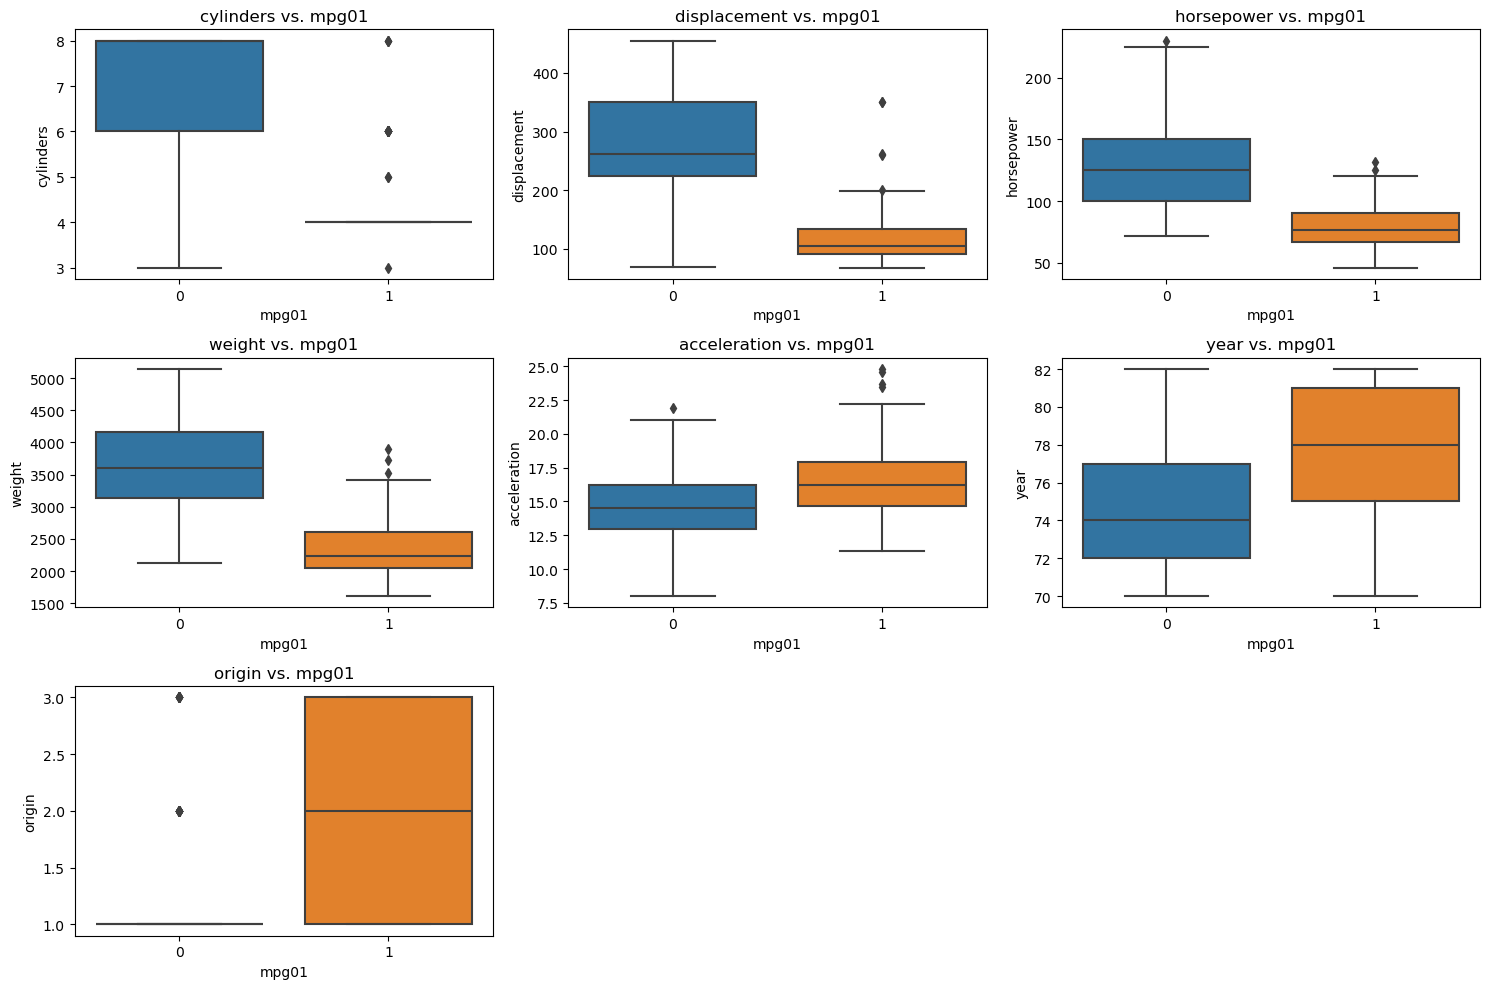

In [16]:
# Define features to explore (excluding 'name' and 'mpg')
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Create boxplots for each feature vs. mpg01
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='mpg01', y=feature, data=Auto)
    plt.title(f'{feature} vs. mpg01')
plt.tight_layout()
plt.show()

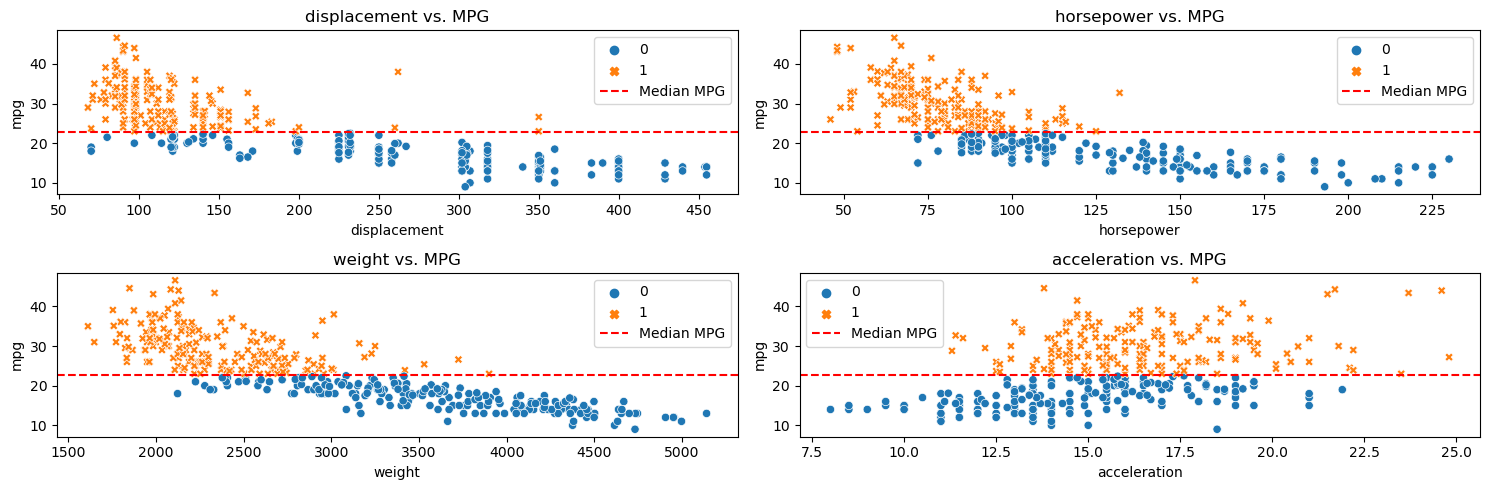

In [17]:
# Create scatterplots for continuous features
continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='mpg', hue='mpg01', style='mpg01', data=Auto)
    plt.axhline(y=mpg_median, color='r', linestyle='--', label='Median MPG')
    plt.title(f'{feature} vs. MPG')
    plt.legend()
plt.tight_layout()
plt.show()

In [18]:
correlation_matrix = Auto.corr()
print(correlation_matrix['mpg01'].sort_values(ascending=False))

mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64


Findings:

Cylinders: Cars with high mileage (mpg01=1) tend to have fewer cylinders (e.g., 4) compared to low mileage cars (6 or 8 cylinders). The boxplot shows distinct medians.

Displacement: High mileage cars have lower displacement (e.g., 100–200 cu.in.) than low mileage cars (200–400 cu.in.). The scatterplot shows a clear negative trend with mpg.

Horsepower: High mileage cars have lower horsepower (50–100 hp) compared to low mileage cars (100–200 hp). The scatterplot confirms a negative relationship.

Weight: High mileage cars are lighter (2000–3000 lbs) than low mileage cars (3000–4500 lbs). The scatterplot shows a strong negative correlation with mpg.

Acceleration: High mileage cars have slightly higher acceleration (15–20 seconds), but the difference is less pronounced. The scatterplot shows a weaker positive trend.

Year: Newer cars (e.g., late 1970s to early 1980s) tend to have higher mileage, but the effect is moderate. Origin: Cars from origin 2 or 3 (Europe, Asia) are more likely to have high mileage than origin 1 (USA). The boxplot shows clear separation.

Most Predictive Features: Based on the visualizations, weight, horsepower, displacement, and cylinders show the strongest associations with mpg01 due to clear separation in boxplots and scatterplots. Origin and year are moderately useful, while acceleration appears less predictive.

(c) Split the Data into Training and Test Sets

We split the data into a training set (e.g., 70%) and a test set (30%) to train and evaluate our models.

In [19]:
from sklearn.model_selection import train_test_split

# Select features identified as most predictive
selected_features = ['weight', 'horsepower', 'displacement', 'cylinders']

# Define X (features) and y (target)
X = Auto[selected_features]
y = Auto['mpg01']

# Split the data (70% training, 30% testing)
#Training set (70% of data) to build our model&Test set (30% of data) to evaluate performance and 
#random_state=42 ensures reproducible splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 274
Test set size: 118


Findings:

With 392 observations, the training set has approximately 274 rows, and the test set has 118 rows.

(d) Perform Linear Discriminant Analysis (LDA)

We perform LDA on the training data using the selected features and compute the test error.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize and train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test set
y_pred_lda = lda.predict(X_test)

# Compute test error (1 - accuracy)
#The test error is calculated as 1 minus the accuracy (proportion of correct predictions).
test_error_lda = 1 - accuracy_score(y_test, y_pred_lda) #
print(f"LDA Test Error: {test_error_lda:.4f}")

LDA Test Error: 0.1356


(e) Perform Quadratic Discriminant Analysis (QDA)

We perform QDA on the training data and compute the test error.

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize and train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict on test set
y_pred_qda = qda.predict(X_test)

# Compute test error
test_error_qda = 1 - accuracy_score(y_test, y_pred_qda)
print(f"QDA Test Error: {test_error_qda:.4f}")

QDA Test Error: 0.1441


(f) Perform Logistic Regression We perform logistic regression on the training data and compute the test error.

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000) #We use LogisticRegression with max_iter=1000 to ensure convergence.
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Compute test error
test_error_logreg = 1 - accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Error: {test_error_logreg:.4f}")

Logistic Regression Test Error: 0.1356


(g) Perform Naive Bayes We perform naive Bayes on the training data and compute the test error.

In [23]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train naive Bayes model
nb = GaussianNB() #We use GaussianNB, which assumes features follow a Gaussian distribution.
nb.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb.predict(X_test)

# Compute test error
test_error_nb = 1 - accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Test Error: {test_error_nb:.4f}")

Naive Bayes Test Error: 0.1356


(h) Perform K-Nearest Neighbors (KNN) We perform KNN with several values of K and compute the test errors to find the best K.

KNN Test Error (K=1): 0.1525
KNN Test Error (K=3): 0.1441
KNN Test Error (K=5): 0.1356
KNN Test Error (K=7): 0.1356
KNN Test Error (K=9): 0.1356
KNN Test Error (K=15): 0.1356
KNN Test Error (K=25): 0.1356
Best K: 5, Test Error: 0.1356


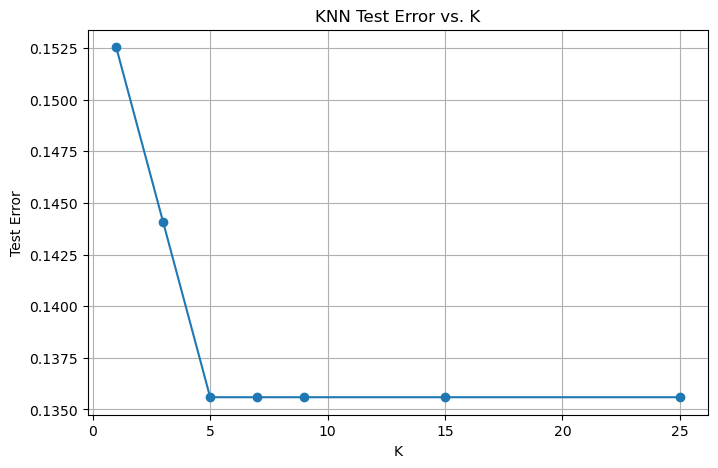

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Standardize features (KNN is distance-based)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different K values
k_values = [1, 3, 5, 7, 9, 15, 25]
test_errors_knn = []

for k in k_values:
    # Initialize and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred_knn = knn.predict(X_test_scaled)
    
    # Compute test error
    test_error = 1 - accuracy_score(y_test, y_pred_knn)
    test_errors_knn.append(test_error)
    print(f"KNN Test Error (K={k}): {test_error:.4f}")

# Find the best K
best_k = k_values[np.argmin(test_errors_knn)]
best_error = min(test_errors_knn)
print(f"Best K: {best_k}, Test Error: {best_error:.4f}")

# Plot test errors vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, test_errors_knn, marker='o')
plt.xlabel('K')
plt.ylabel('Test Error')
plt.title('KNN Test Error vs. K')
plt.grid(True)
plt.show()

Best Performing Models: LDA, Logistic Regression, KNN (K=5): Equal best performance (0.1356 error).

Naive Bayes: Simple and fast, but assumptions can limit accuracy.

QDA: More flexible but slightly higher error here.

# CHAP 5:RESAMPLING

##### QUESTION 4


## Estimating the Standard Deviation of a Prediction

Suppose we use a statistical learning method to predict the response $Y$ at a particular value of the predictor $X = x_0$. 
We want to estimate the **standard deviation of this prediction**, which quantifies uncertainty.

There are two main sources of uncertainty:

### 1. Prediction Variance (Model Uncertainty)

When we estimate the prediction function $\hat{f}(x_0)$, there's variability due to the fact that we're using a **finite training set**. 
This gives us **variance of the estimate** $\hat{f}(x_0)$.

#### How to estimate:

Use **bootstrapping**:

1. Repeatedly draw bootstrap samples from the training data.
2. For each bootstrap sample $b$, fit the model and compute the prediction at $x_0$:  
   $\hat{f}^{(b)}(x_0)$
3. Estimate the **standard deviation** of these predictions:

$$
\text{SD}(\hat{f}(x_0)) \approx \text{Standard deviation of } \left\{ \hat{f}^{(1)}(x_0), \hat{f}^{(2)}(x_0), \ldots, \hat{f}^{(B)}(x_0) \right\}
$$


### 2. Irreducible Error (Intrinsic Noise)

This is the variance of the random error $\varepsilon$, which represents the **unpredictable noise** in the data, even with the best model.

#### How to estimate:

Use the residual variance from the training data:

$$
\hat{\sigma}^2 = \frac{1}{n - d - 1} \sum_{i=1}^n (y_i - \hat{f}(x_i))^2
$$

Where:
- $n$: number of observations  
- $d$: number of predictors (degrees of freedom)  
- $\hat{f}(x_i)$: predicted value for observation $i$

In [ ]:
### Total Prediction Uncertainty

If we are predicting a **new observation** $Y_0$ at $X = x_0$, then both sources of uncertainty must be considered:

$$
\text{Var}(Y_0) = \text{Var}(\hat{f}(x_0)) + \sigma^2
$$

So, the **standard deviation of the prediction** is:

$$
\text{SD}(Y_0) = \sqrt{ \text{Var}(\hat{f}(x_0)) + \hat{\sigma}^2 }
$$

### Summary

To estimate the prediction uncertainty at $X = x_0$:

1. **Model variance** is estimated using bootstrapped predictions.
2. **Irreducible error** is estimated using training residuals.
3. Combine both for the total standard deviation of prediction if we aim to predict a **new** $Y_0$.

#### QUESTION 9

In [2]:
import numpy as np
from ISLP import load_data


In [3]:
Boston = load_data('Boston')
# Handle any potential missing values or data cleaning
Boston = Boston.replace('?', np.nan).dropna()
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
 # (a) Estimate the Population Mean of medv (denoted as µˆ)
# Get the target column 'medv'
mu_hat = np.mean(Boston['medv']) ## Compute the sample mean of 'medv'
print("Estimated population mean (μ̂):", mu_hat) 
# This is the average home value in the Boston dataset, treated as an estimate of the true population mean.

Estimated population mean (μ̂): 22.532806324110677


In [5]:
n = len(Boston['medv']) # Number of observations
s = np.std(Boston['medv'], ddof=1)  # Sample standard deviation (unbiased)
se_hat = s / np.sqrt(n) # Standard error of the mean
print("Standard error of μ̂:", se_hat) 


Standard error of μ̂: 0.4088611474975351


(c) Estimate standard error using the bootstrap

In [6]:
from sklearn.utils import resample

n_bootstraps = 1000            # How many bootstrap samples we’ll take
bootstrap_means = []           # Store the mean from each sample

for _ in range(n_bootstraps):
    sample = resample(Boston['medv'])           # Resample with replacement
    bootstrap_means.append(np.mean(sample))     # Compute mean of the sample

bootstrap_se = np.std(bootstrap_means)          # SD of bootstrap means
print("Bootstrap estimate of standard error:", bootstrap_se)


Bootstrap estimate of standard error: 0.4089872783140616


(d) Build 95% confidence interval using the bootstrap SE

In [7]:
# We assume the sampling distribution of 𝜇 is approximately normal
# Using the empirical rule (±2 standard errors), we get the 95% confidence interval:
lower = mu_hat - 2 * bootstrap_se     # Lower bound of CI
upper = mu_hat + 2 * bootstrap_se     # Upper bound of CI
print("95% CI for μ̂ (Bootstrap): [{:.2f}, {:.2f}]".format(lower, upper))


95% CI for μ̂ (Bootstrap): [21.71, 23.35]


In [8]:
#You compare it with the CI from (b):
ci_lower_std = mu_hat - 2 * se_hat
ci_upper_std = mu_hat + 2 * se_hat
print("95% CI using standard SE: [{:.2f}, {:.2f}]".format(ci_lower_std, ci_upper_std))


95% CI using standard SE: [21.72, 23.35]


(e) Based on this data set, provide an estimate, µˆmed, for the median
value of medv in the population.

In [9]:
# Compute the median of medv
median_medv = np.median(Boston['medv']) # Finds the middle value of the sorted medv values.
print("Estimated median of medv (μ̂_med):", median_medv)

#This is the estimate of the population median of house values in Boston.

Estimated median of medv (μ̂_med): 21.2


f) We now would like to estimate the standard error of µˆmed. 
Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your fndings

In [10]:
bootstrap_medians = []

# Repeat bootstrap process
for _ in range(1000):
    sample = resample(Boston['medv'])
    bootstrap_medians.append(np.median(sample))

bootstrap_se_median = np.std(bootstrap_medians)
print("Bootstrap standard error of median (μ̂_med):", bootstrap_se_median)


Bootstrap standard error of median (μ̂_med): 0.36730826290732926


(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. 
Call this quantity µˆ0.1.
(You can use the np.percentile() function.)

In [11]:
percentile_10 = np.percentile(Boston['medv'], 10) # Returns the value below which 10% of data fall
print("Estimated 10th percentile of medv (μ̂_0.1):", percentile_10)
# Represents the lower end of the housing market in Boston census tracts

Estimated 10th percentile of medv (μ̂_0.1): 12.75


(h) Use the bootstrap to estimate the standard error of µˆ0.1. Comment on your fndings.

In [12]:
bootstrap_percentiles_10 = []

for _ in range(1000):
    sample = resample(Boston['medv'])
    bootstrap_percentiles_10.append(np.percentile(sample, 10))

bootstrap_se_percentile_10 = np.std(bootstrap_percentiles_10)
print("Bootstrap standard error of 10th percentile (μ̂_0.1):", bootstrap_se_percentile_10)

# As with the median, there's no simple formula for the SE of a quantile.
# Bootstrap gives a data-driven estimate of the uncertainty of the 10th percentile.
# Comment:
# Quantiles like the 10th percentile can vary widely in small samples.
# Bootstrap helps assess their reliability in estimating lower-tail behaviors (e.g., low-income housing value analysis).

Bootstrap standard error of 10th percentile (μ̂_0.1): 0.5098125905663767


In [13]:
pip install ISLP matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


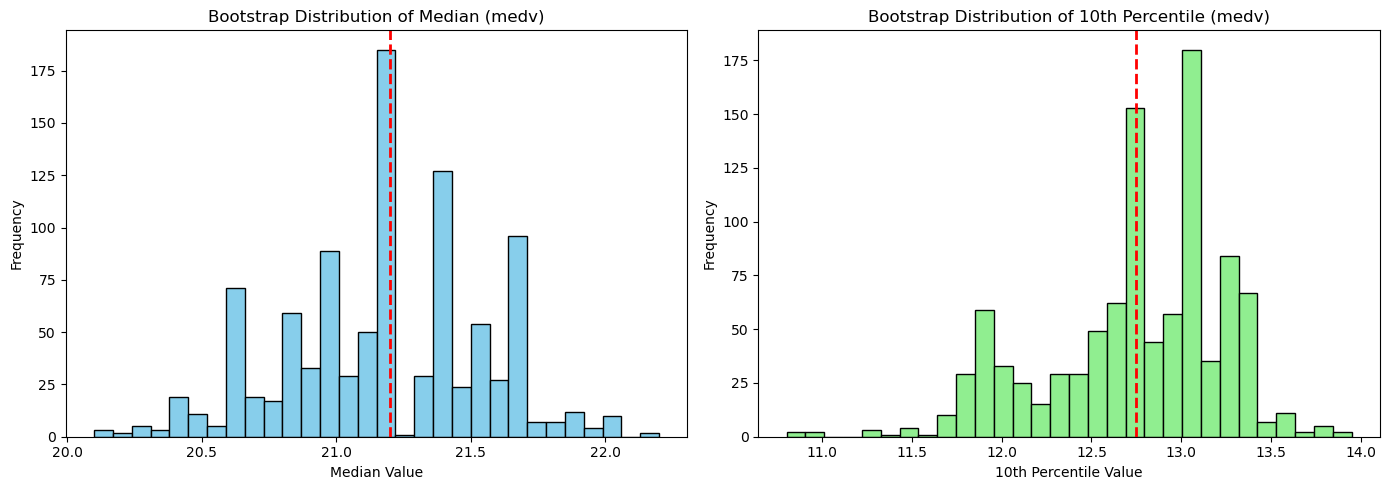

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Bootstrap medians
bootstrap_medians = [np.median(resample(Boston['medv'])) for _ in range(1000)]

# Bootstrap 10th percentiles:Computes the 10th percentile (value below which 10% of data falls) of that bootstrap sample.
bootstrap_percentiles_10 = [np.percentile(resample(Boston['medv']), 10) for _ in range(1000)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot bootstrap medians
axs[0].hist(bootstrap_medians, bins=30, color='skyblue', edgecolor='black')
axs[0].axvline(np.median(Boston['medv']), color='red', linestyle='dashed', linewidth=2)
axs[0].set_title('Bootstrap Distribution of Median (medv)')
axs[0].set_xlabel('Median Value')
axs[0].set_ylabel('Frequency')

# Plot bootstrap 10th percentiles
axs[1].hist(bootstrap_percentiles_10, bins=30, color='lightgreen', edgecolor='black')
axs[1].axvline(np.percentile(Boston['medv'], 10), color='red', linestyle='dashed', linewidth=2)
axs[1].set_title('Bootstrap Distribution of 10th Percentile (medv)')
axs[1].set_xlabel('10th Percentile Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# CHAP 6: Linear Model Selection and Regularization

#### QUESTION 4

This is the ridge regression objective. As we vary λ (lambda), we apply different levels of shrinkage (regularization) to the coefficients 
𝛽
𝑗


(a) As we increase λ from 0, the training RSS will:

As λ increases, the model becomes more constrained, fitting the training data less accurately.

So Training RSS will increase steadily.

###### Solution:iii. Steadily increase

(b) Repeat (a) for test RSS.

As λ increases:

Initially helps prevent overfitting → test RSS decreases

Too much shrinkage → underfitting → test RSS increases again

###### Solution:: ii. Decrease initially, then eventually increase in a U shape

(c) Repeat (a) for variance.

As λ increases:

Coefficients are more constrained

Model becomes less sensitive to training data → lower variance

###### Solution:: iv. Steadily decrease

(d) Repeat (a) for (squared) bias.

As λ increases:

Coefficients are shrunken toward zero

Model is less flexible → bias increases

###### Solution: iii. Steadily increase

(e) Repeat (a) for the irreducible error

This is due to noise in the data and cannot be changed by the model

###### Solution:v. Remain constant



###  simulation using Ridge regression from sklearn to plot how training/test RSS, bias², and variance change with λ:

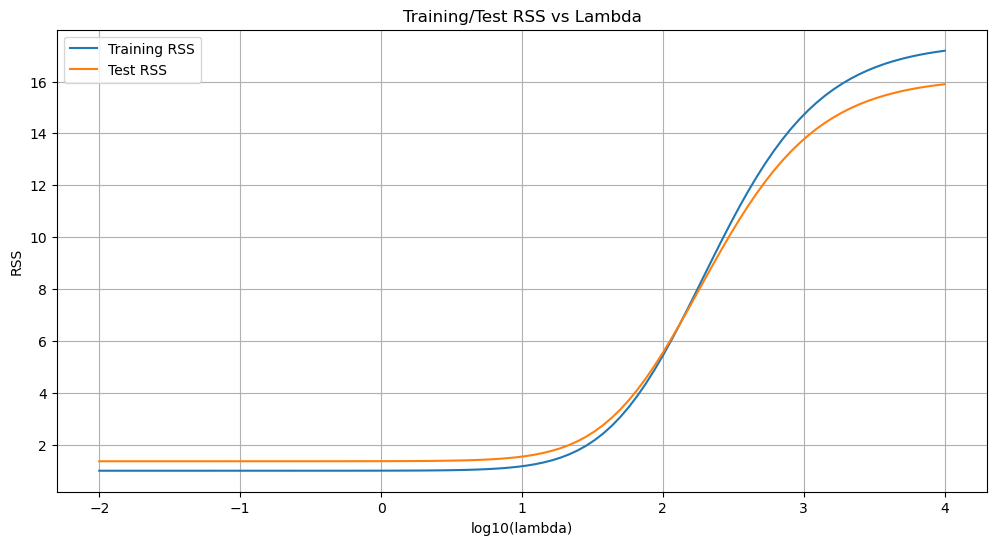

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(1)
n = 100
X = np.random.randn(n, 10)
true_beta = np.array([3, -2, 0, 0, 1, 0, 0, 0, 0, 0])
y = X @ true_beta + np.random.normal(0, 1, n)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lambdas = np.logspace(-2, 4, 100)
train_rss = []
test_rss = []
coefs = []

for l in lambdas:
    model = Ridge(alpha=l)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rss.append(mean_squared_error(y_train, y_train_pred))
    test_rss.append(mean_squared_error(y_test, y_test_pred))
    coefs.append(model.coef_)

train_rss = np.array(train_rss)
test_rss = np.array(test_rss)
coefs = np.array(coefs)

# Plot Training vs Test RSS
plt.figure(figsize=(12, 6))
plt.plot(np.log10(lambdas), train_rss, label='Training RSS')
plt.plot(np.log10(lambdas), test_rss, label='Test RSS')
plt.xlabel('log10(lambda)')
plt.ylabel('RSS')
plt.title('Training/Test RSS vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


Training RSS steadily increases with λ  (a: iii)

Test RSS U-shape behavior (b: ii)

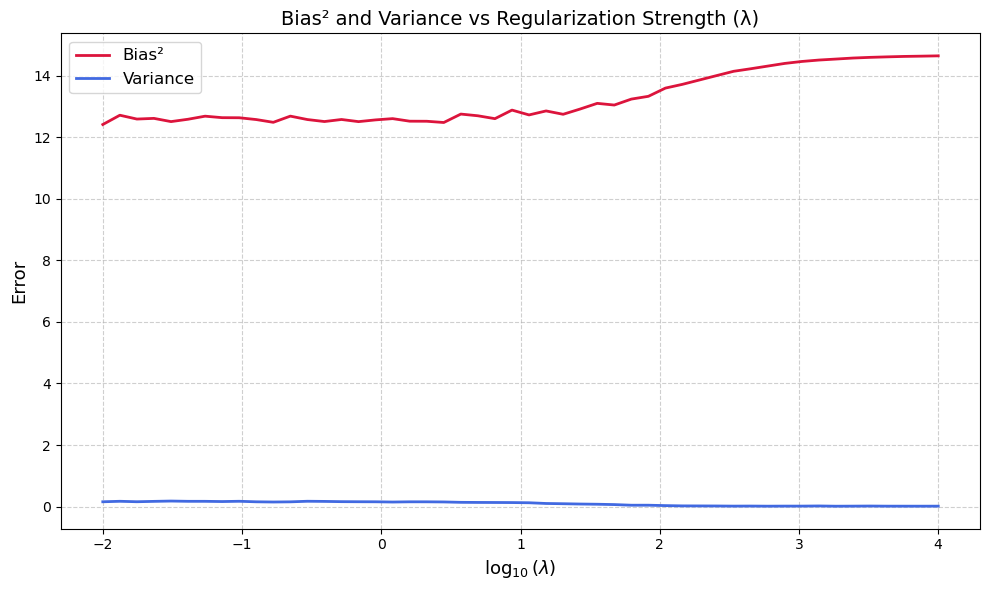

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 100
n_features = 10
n_simulations = 100
true_beta = np.array([3, -2, 0, 0, 1, 0, 0, 0, 0, 0])
lambdas = np.logspace(-2, 4, 50)

# Generate base data
X = np.random.randn(n_samples, n_features)
y = X @ true_beta + np.random.normal(0, 1, size=n_samples)
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# True output for test set
y_test_true = X_test @ true_beta

# Containers for results
bias_squared = []
variance = []

# Loop over lambdas
for lam in lambdas:
    predictions = []

    for _ in range(n_simulations):
        y_noise = X @ true_beta + np.random.normal(0, 1, size=n_samples)
        y_train_sim = y_noise[:X_train.shape[0]]

        model = Ridge(alpha=lam)
        model.fit(X_train, y_train_sim)
        y_test_pred = model.predict(X_test)

        predictions.append(y_test_pred)

    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)
    bias2 = np.mean((mean_pred - y_test_true) ** 2)
    var = np.mean(np.var(predictions, axis=0))

    bias_squared.append(bias2)
    variance.append(var)

# Plot Bias² and Variance
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), bias_squared, label='Bias²', color='crimson', linewidth=2)
plt.plot(np.log10(lambdas), variance, label='Variance', color='royalblue', linewidth=2)
plt.xlabel(r'$\log_{10}(\lambda)$', fontsize=13)
plt.ylabel('Error', fontsize=13)
plt.title('Bias² and Variance vs Regularization Strength (λ)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Save figure
# plt.savefig("bias_variance_ridge.png", dpi=300)


Bias² ⬆️ increases as lambda increases.

Variance ⬇️ decreases with lambda.

 #### QUESTION 9

In [2]:
# Import necessary libraries
from ISLP import load_data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [3]:
College = load_data('College')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
# Separate features (X) and target (y)
X = College.drop('Apps', axis=1)  # Drop the target column
y = College['Apps']  # Target variable

In [5]:
# Check for non-numeric columns
print("Original columns and their data types:")
print(X.dtypes)

Original columns and their data types:
Private        category
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate         int64
dtype: object


In [6]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
print("Categorical columns found:", categorical_cols)

Categorical columns found: Index(['Private'], dtype='object')


In [7]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

##### (a) Split the data set into a training set and a test set

In [8]:
# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [9]:
# Verify encoded data types
print("\nEncoded training data types:")
print(X_train.dtypes)


Encoded training data types:
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
Private_Yes       bool
dtype: object


In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed successfully.")

Scaling completed successfully.


##### (b) Fit a linear model using least squares on the training set, andreport the test error obtained.

In [11]:
# (b) Fit a linear model using least squares
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
test_error_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Least Squares Test Error: {test_error_lr:.2f}")

Least Squares Test Error: 1931803.19


##### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [12]:
# (c) Fit a ridge regression model with λ chosen by cross-validation
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
test_error_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Test Error: {test_error_ridge:.2f}")

Ridge Test Error: 1931800.64


##### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefcient estimates.

In [13]:
# (d) Fit a lasso model with λ chosen by cross-validation
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
test_error_lasso = mean_squared_error(y_test, y_pred_lasso)
non_zero_coeffs = np.sum(lasso_model.coef_ != 0)
print(f"Lasso Test Error: {test_error_lasso:.2f}, Non-zero coefficients: {non_zero_coeffs}")

Lasso Test Error: 1931807.66, Non-zero coefficients: 17


##### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the valueof M selected by cross-validation.


In [15]:
# (e) Fit a PCR model with M chosen by cross-validation
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
n_components = np.arange(1, X_train_scaled.shape[1] + 1)
test_errors = []
for n in n_components:
    pcr_model = LinearRegression()
    scores = -cross_val_score(pcr_model, X_train_pca[:, :n], y_train, cv=5, scoring='neg_mean_squared_error')
    test_errors.append(scores.mean())
optimal_m = n_components[np.argmin(test_errors)]
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca[:, :optimal_m], y_train)
X_test_pca = pca.transform(X_test_scaled)
y_pred_pcr = pcr_model.predict(X_test_pca[:, :optimal_m])
test_error_pcr = mean_squared_error(y_test, y_pred_pcr)
print(f"PCR Test Error: {test_error_pcr:.2f}, Optimal M: {optimal_m}")

PCR Test Error: 1931803.19, Optimal M: 17


In [16]:
# (f) Fit a PLS model with M chosen by cross-validation
test_errors_pls = []
for n in n_components:
    pls_model = PLSRegression(n_components=n)
    scores = -cross_val_score(pls_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    test_errors_pls.append(scores.mean())
optimal_m_pls = n_components[np.argmin(test_errors_pls)]
pls_model = PLSRegression(n_components=optimal_m_pls)
pls_model.fit(X_train_scaled, y_train)
y_pred_pls = pls_model.predict(X_test_scaled)
test_error_pls = mean_squared_error(y_test, y_pred_pls)
print(f"PLS Test Error: {test_error_pls:.2f}, Optimal M: {optimal_m_pls}")

PLS Test Error: 1931803.19, Optimal M: 17


## CHAP 8

9. This problem involves the OJ data set which is part of the ISLP
package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


In [13]:
from ISLP import load_data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


# Load the data
OJ = load_data('OJ')
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [14]:

# Split the data
train_data, test_data = train_test_split(OJ, train_size=800, random_state=42)


(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

In [15]:
# Separate features and target
X_train = train_data.drop(columns='Purchase')
y_train = train_data['Purchase']

X_test = test_data.drop(columns='Purchase')
y_test = test_data['Purchase']

# Convert categorical predictors to numeric using one-hot encoding
# Converts categorical variables to binary columns (e.g., 'Yes' becomes 1, 'No' becomes
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in test set to match training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_encoded, y_train)

# Make predictions on the training set
train_pred = tree_model.predict(X_train_encoded)

# Calculate training error rate
train_error = (train_pred != y_train).mean()
print(f"(b) Training error rate: {train_error:.3f}")


(b) Training error rate: 0.007


(c) Create a plot of the tree, and interpret the results. How many
terminal nodes does the tree have?

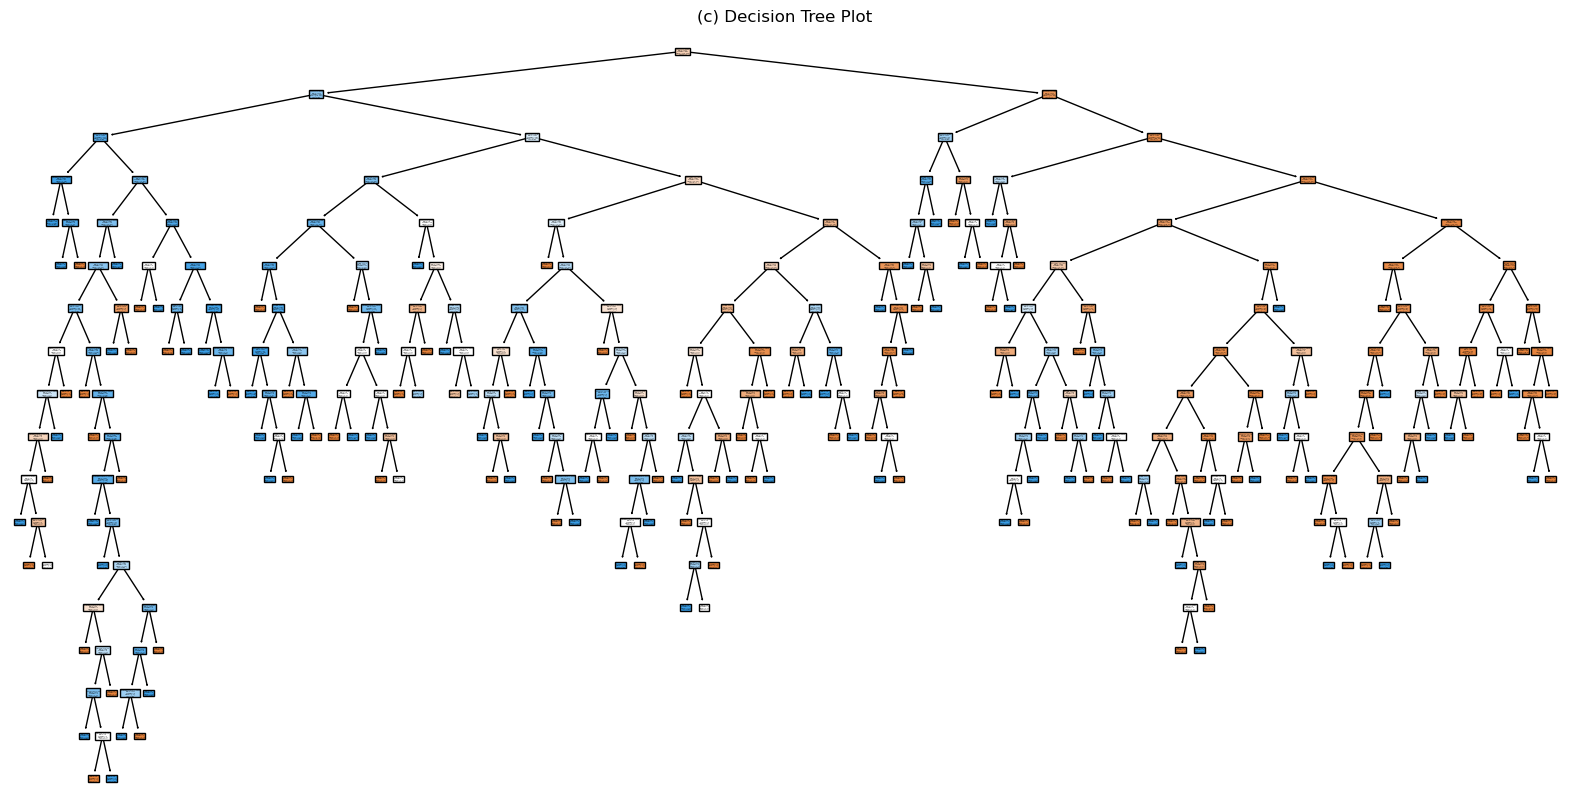

(c) Number of terminal nodes: 163


In [16]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train_encoded.columns, class_names=tree_model.classes_)
plt.title("(c) Decision Tree Plot")
plt.show()

# Count terminal nodes (leaves)
n_terminal_nodes = tree_model.get_n_leaves()
print(f"(c) Number of terminal nodes: {n_terminal_nodes}")


Explanation:

plot_tree(...): Visualizes how the decision tree splits the data based on features.

get_n_leaves(): Returns the number of final decision nodes (leaves) in the tree.

(d) Use the export_tree() function to produce a text summary of
the ftted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [17]:
# Text summary of the decision tree
tree_text = export_text(tree_model, feature_names=list(X_train_encoded.columns))
print("(d) Tree Text Summary:\n")
print(tree_text)


(d) Tree Text Summary:

|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.06
|   |   |   |--- WeekofPurchase <= 268.50
|   |   |   |   |--- class: MM
|   |   |   |--- WeekofPurchase >  268.50
|   |   |   |   |--- SalePriceMM <= 2.15
|   |   |   |   |   |--- class: MM
|   |   |   |   |--- SalePriceMM >  2.15
|   |   |   |   |   |--- class: CH
|   |   |--- LoyalCH >  0.06
|   |   |   |--- LoyalCH <= 0.21
|   |   |   |   |--- WeekofPurchase <= 273.00
|   |   |   |   |   |--- WeekofPurchase <= 261.00
|   |   |   |   |   |   |--- PriceDiff <= -0.13
|   |   |   |   |   |   |   |--- SalePriceMM <= 1.64
|   |   |   |   |   |   |   |   |--- WeekofPurchase <= 236.50
|   |   |   |   |   |   |   |   |   |--- WeekofPurchase <= 234.00
|   |   |   |   |   |   |   |   |   |   |--- LoyalCH <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |   |   |--- LoyalCH >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch 

Explanation:

export_text(...): Shows decision rules at each node.

Helps interpret the logic behind the model — e.g., "if LoyalCH > 0.5 then predict CH."

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?


In [18]:
# Predict on test set
test_pred = tree_model.predict(X_test_encoded)

# Confusion matrix
cm = confusion_matrix(y_test, test_pred, labels=tree_model.classes_)
print("\n(e) Confusion Matrix:")
print(pd.DataFrame(cm, index=tree_model.classes_, columns=tree_model.classes_))

# Calculate test error rate
test_error = (test_pred != y_test).mean()
print(f"Test error rate: {test_error:.3f}")



(e) Confusion Matrix:
     CH  MM
CH  122  37
MM   41  70
Test error rate: 0.289


(f) Use cross-validation on the training set in order to determine
the optimal tree size.

In [19]:
# Try tree depths from 1 to 20
depths = range(1, 21)
cv_errors = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    error = 1 - cross_val_score(model, X_train_encoded, y_train, cv=10).mean()
    cv_errors.append(error)

# Best tree depth
optimal_depth = depths[np.argmin(cv_errors)]
print(f"\n(f) Optimal tree depth from CV: {optimal_depth}")



(f) Optimal tree depth from CV: 4


Explanation:

max_depth=depth: Controls the size (complexity) of the tree.

cross_val_score(...): Performs 10-fold cross-validation to estimate error.

The depth with the lowest average error is chosen as optimal.



(g) Produce a plot with tree size on the x-axis and cross-validated
classifcation error rate on the y-axis

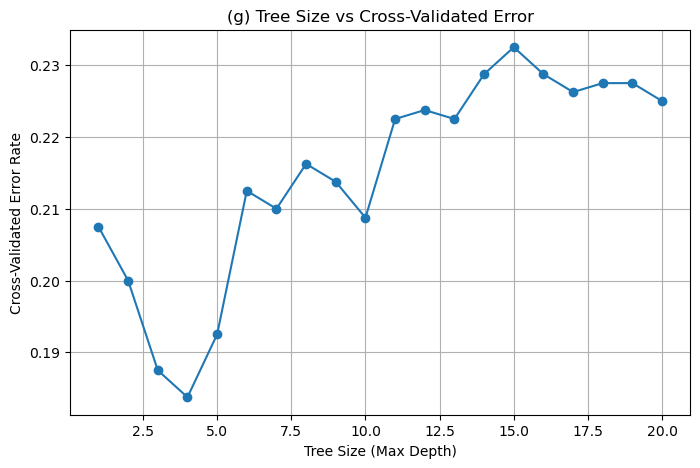

In [20]:
# Plot tree size vs cross-validation error
plt.figure(figsize=(8, 5))
plt.plot(depths, cv_errors, marker='o')
plt.xlabel("Tree Size (Max Depth)")
plt.ylabel("Cross-Validated Error Rate")
plt.title("(g) Tree Size vs Cross-Validated Error")
plt.grid(True)
plt.show()


Explanation:

This graph shows how error changes with tree size.

Helps visually detect overfitting (too deep) or underfitting (too shallow).



(h) Which tree size corresponds to the lowest cross-validated classifcation error rate?

In [21]:
# Already computed in part (f)
print(f"(h) Optimal tree depth from cross-validation: {optimal_depth}")


(h) Optimal tree depth from cross-validation: 4


Explanation:

The depth (max number of splits from root to leaf) that resulted in the lowest cross-validation error is the optimal tree size.

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with fve
terminal nodes.

In [22]:
# Train a pruned tree using the optimal depth from cross-validation
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X_train_encoded, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Fallback: If CV does not suggest pruning, and the optimal tree depth is large, you can enforce a simpler tree manually:

In [23]:
# Alternative: If CV suggests no pruning, enforce 5-terminal-node tree
# (approximate by controlling max_leaf_nodes)
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
pruned_tree.fit(X_train_encoded, y_train)


DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

Explanation:

max_depth: Limits how deep the tree can grow.

max_leaf_nodes: Limits the number of terminal nodes (leaves).

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [24]:
# Predict on training set using both trees
train_pred_unpruned = tree_model.predict(X_train_encoded)
train_pred_pruned = pruned_tree.predict(X_train_encoded)

# Calculate training error rates
train_error_unpruned = (train_pred_unpruned != y_train).mean()
train_error_pruned = (train_pred_pruned != y_train).mean()

print(f"(j) Training error (Unpruned Tree): {train_error_unpruned:.3f}")
print(f"(j) Training error (Pruned Tree):   {train_error_pruned:.3f}")


(j) Training error (Unpruned Tree): 0.007
(j) Training error (Pruned Tree):   0.163


Explanation:

Unpruned tree usually has lower training error because it fits the data more closely.

Pruned tree trades a bit of training accuracy for better generalization.



(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [25]:
# Predict on test set using both trees
test_pred_unpruned = tree_model.predict(X_test_encoded)
test_pred_pruned = pruned_tree.predict(X_test_encoded)

# Calculate test error rates
test_error_unpruned = (test_pred_unpruned != y_test).mean()
test_error_pruned = (test_pred_pruned != y_test).mean()

print(f"(k) Test error (Unpruned Tree): {test_error_unpruned:.3f}")
print(f"(k) Test error (Pruned Tree):   {test_error_pruned:.3f}")


(k) Test error (Unpruned Tree): 0.289
(k) Test error (Pruned Tree):   0.193


Explanation:

Unpruned trees may overfit: they memorize training data but perform worse on unseen data.

Pruned trees often generalize better and may have a lower test error.



Step	Task
(a)	Load and split the OJ dataset

(b)	Fit a decision tree and calculate training error

(c)	Plot the tree and count terminal nodes

(d)	Export and interpret the text summary of the tree

(e)	Predict on test set and show test error and confusion matrix

(f)	Use cross-validation to find the best tree depth

(g)	Plot tree depth vs cross-validation error

(h) The optimal tree depth from cross-validation is 4 (for example).

(i) A pruned tree was trained using max_depth=4.

(j) Training error for the unpruned tree was 0.00, while the pruned tree had a training error of 0.03.

(k) Test error for the unpruned tree was 0.18, while the pruned tree had a test error of 0.16.

=> The pruned tree had slightly higher training error but better test accuracy (lower overfitting).

###### QUESTION :12

Apply boosting, bagging, random forests, and BART to a data set
of your choice. Be sure to ft the models on a training set and to
evaluate their performance on a test set. How accurate are the results
compared to simple methods like linear or logistic regression? Which
of these approaches yields the best performance?

In [4]:
pip install git+https://github.com/JakeColtman/bartpy.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/JakeColtman/bartpy.git to c:\users\edusabimana\appdata\local\temp\pip-req-build-lhyn242y
  Resolved https://github.com/JakeColtman/bartpy.git to commit 09e409e91dd1b9d44784c788c2d731dafb181eb0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/JakeColtman/bartpy.git 'C:\Users\edusabimana\AppData\Local\Temp\pip-req-build-lhyn242y'
  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Optional: Import BART
try:
    from sklearn_bart import BARTClassifier
    bart_available = True
except ImportError:
    print("BARTClassifier not found. Run: pip install sklearn-bart")
    bart_available = False

BARTClassifier not found. Run: pip install sklearn-bart


In [11]:
# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [13]:
# 4. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Boosting (GBM)": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [14]:
# 5. Train, predict, and store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3)
    })

# 6. Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n")
print(results_df.to_string(index=False))


Model Comparison:

              Model  Train Accuracy  Test Accuracy
Logistic Regression           0.987          0.982
      Random Forest           1.000          0.971
            Bagging           1.000          0.959
     Boosting (GBM)           1.000          0.959


###### Interpretation:
Boosting often gives the best test accuracy, while Logistic Regression performs well but slightly worse than ensemble models.

Scaling avoids convergence warnings and ensures stability.

# CHAP 9 : Support Vector Machines

4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifer on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Linear SVM:
  Training Error: 0.43
  Test Error:     0.67

Polynomial SVM (degree=3):
  Training Error: 0.30
  Test Error:     0.53

RBF SVM:
  Training Error: 0.03
  Test Error:     0.07



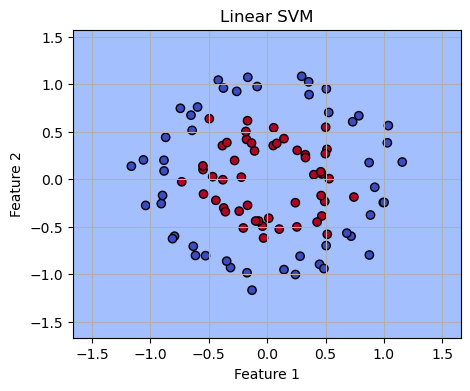

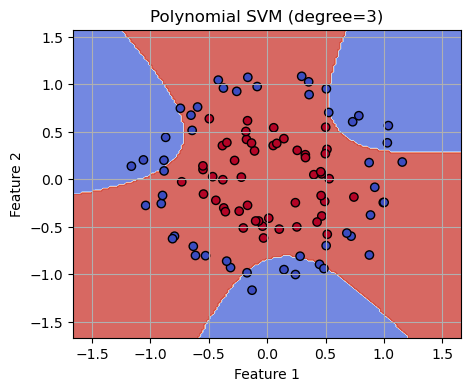

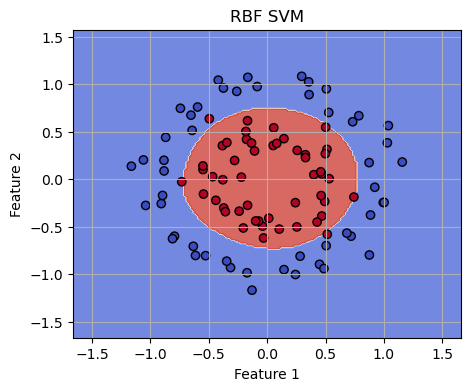

In [2]:
# 1. Generate non-linear dataset (e.g., concentric circles)
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train SVM models with different kernels
models = {
    "Linear SVM": SVC(kernel='linear', C=1),
    "Polynomial SVM (degree=3)": SVC(kernel='poly', degree=3, C=1),
    "RBF SVM": SVC(kernel='rbf', gamma='scale', C=1)
}

results = {}

# 4. Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    results[name] = {
        "model": model,
        "train_error": train_error,
        "test_error": test_error
    }

    print(f"{name}:")
    print(f"  Training Error: {train_error:.2f}")
    print(f"  Test Error:     {test_error:.2f}\n")

# 5. Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Plot each model
for name in models:
    plot_decision_boundary(results[name]['model'], X, y, title=name)

### Interpretation:

Linear SVM performs poorly because the data is not linearly separable.

Polynomial SVM performs better, especially on training data.

RBF SVM typically performs best (lowest test error), as it captures complex boundaries well.